### INSTACART MARKET BASKET ANALYSIS

Instacart Project:
Instacart is an online grocery application where a customer can order online and a shopper would do the shopping and deliver the groceries to them.
There are 6 datasets available here:
1. prior ordered products: Specify the order id,product id, order at which the product is added to the basket per order, and if the product is reordered.

2. products: includes the product's id, name of product, aisle id, and department id.

3. order products train:

4. aisles: includes the aisle id and at what the aisle id correspond to, such as specialty cheeses, energy granola bars, etc.

5. orders: includes the order number,user id,

6. departments: includes department id and what department is the grocery in.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prior_order = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
order_products_train = pd.read_csv('order_products__train.csv')
aisles = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')

# Data Wrangling

In data wrangling, we would like to check for any missing values, any variables that are mistakenly input into the data, and fill out the missing values with other values or simply drop them if they do not really help out with the data and if there are not a lot of data to be excluded.

In [3]:
#find out how the prior order table looks like
print(prior_order.shape)
prior_order.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
#check if there is any missing values in the prior order table
prior_order.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Prior order indicates that there are no missing values

In [5]:
orders.shape

(3421083, 7)

In [6]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
average_order_hours = orders.groupby('user_id').agg({'order_hour_of_day':'mean'})

In [8]:
average_order_hours.reset_index(inplace=True,drop=False)

In [9]:
orders = pd.merge(orders,average_order_hours,on='user_id',how='left')

The graph above shows the average hour of day that the customer orders.

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day_x,days_since_prior_order,order_hour_of_day_y
0,2539329,1,prior,1,2,8,NaN,10.090909
1,2398795,1,prior,2,3,7,15.0,10.090909
2,473747,1,prior,3,3,12,21.0,10.090909
3,2254736,1,prior,4,4,7,29.0,10.090909
4,431534,1,prior,5,4,15,28.0,10.090909


In [11]:
#rename all the columns:
orders.columns = ['order_id','user_id','eval_set','order_number','order_dow','order_hour_of_day',
                  'days_since_prior_order','average_order_hour_of_day']

In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
0,2539329,1,prior,1,2,8,NaN,10.090909
1,2398795,1,prior,2,3,7,15.0,10.090909
2,473747,1,prior,3,3,12,21.0,10.090909
3,2254736,1,prior,4,4,7,29.0,10.090909
4,431534,1,prior,5,4,15,28.0,10.090909


In [13]:
missing_orders = orders.isnull().sum()
missing_orders

order_id                          0
user_id                           0
eval_set                          0
order_number                      0
order_dow                         0
order_hour_of_day                 0
days_since_prior_order       206209
average_order_hour_of_day         0
dtype: int64

Based on the data above, we can see that there are no missing values for all the columns except for "days_since_prior_order", where it has 206209 missing values.

In [14]:
total_orders = orders.isnull().count()

In [15]:
percentage_orders = missing_orders/total_orders
percentage_orders

order_id                     0.000000
user_id                      0.000000
eval_set                     0.000000
order_number                 0.000000
order_dow                    0.000000
order_hour_of_day            0.000000
days_since_prior_order       0.060276
average_order_hour_of_day    0.000000
dtype: float64

The table above indicates that the column "days_since_prior_orders" has 6% missing values, as we can see they are indicated by "NaN". However, this NaN indicates that the person has not previously ordered using instacart. Thus, it is possible that we might have to divide the data into two where one would have ordered previously while the other does not.

In [16]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06,3.421083e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01,1.345202e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00,1.803192e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e-01
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,1.226667e+01
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,1.345455e+01
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.462500e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,2.300000e+01


The orders indicate that there is no value that lies beyond the reasonable value. For example, order hour of day is between 0:00 and 23:00 and order day of week is between  0 and 6

In [17]:
products.shape

(49688, 4)

In [18]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
null_products = products[products.isnull().any(axis=1)]
null_products

,product_id,product_name,aisle_id,department_id


We can see from the above that there is no null values in the products table. 

In [20]:
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
null_train = order_products_train[order_products_train.isnull().any(axis=1)]

In [22]:
null_train

,order_id,product_id,add_to_cart_order,reordered


Based on the above analysis, we can see that the 'orders' dataframe has missing values which are "NaN." However, the NaN values are only observed in the column 'days since prior order.' This indicates that the customer has never ordered previously.

In [23]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
departments.isnull().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

The departments data table also has no missing values after being tested for missing values using is null function.

In [25]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [26]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

There are no missing values in aisles table.

# Conclusion of Data Wrangling:

Overall the data is pretty clean and there are no outliers or missing values. The only table that needs to be cleaned is the orders table since it has a "NaN" value which includes customers that have no historical order and thus cannot be analyzed. Fortunately, it only compromise 6% of the total data we have and allows us to exclude them from our analysis.

Thus, we can see that most of the data wrangling work are joining the different tables together in order to analyze the data.

# Data Visualization and Data Exploration

Since the data is all cleaned now, it would be good to explore the data and visualize them to get an idea of how we could predict our data. For instance, we could do data visualization to figure out how do orders vary in a week. Also, we could use data visualization to figure out how long does it take on average for one to reorder his groceries.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [28]:
"""Analyze the orders Dataset based on its evaluation set: prior, train, 
or test to find out how to split them."""
total_set = orders['eval_set'].count()
orders_eval = orders['eval_set'].value_counts()
evaluation_ratio = orders_eval/total_set
evaluation_ratio

prior    0.939724
train    0.038353
test     0.021923
Name: eval_set, dtype: float64

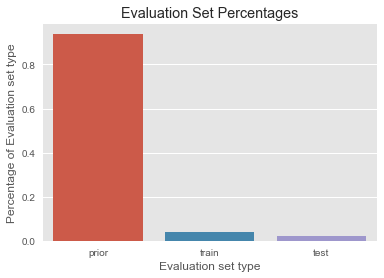

In [29]:
sns.barplot(x = evaluation_ratio.index,y=evaluation_ratio.values)
plt.xlabel("Evaluation set type")
plt.ylabel("Percentage of Evaluation set type")
plt.title("Evaluation Set Percentages")

([<matplotlib.axis.XTick at 0x10d7dec88>,
 <a list of 7 Text xticklabel objects>)

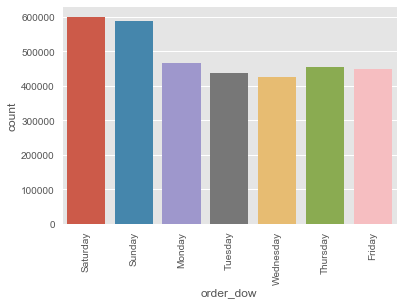

In [30]:
#count how many people shop in each day of the week with 0 = Saturday
sns.countplot(x='order_dow',data=orders)
plt.xticks(np.arange(7),('Saturday','Sunday','Monday','Tuesday','Wednesday',
                         'Thursday','Friday'),rotation='vertical')

We can see that from the chart above, most people order their groceries on Sunday and Monday, and lowest on Thursday.

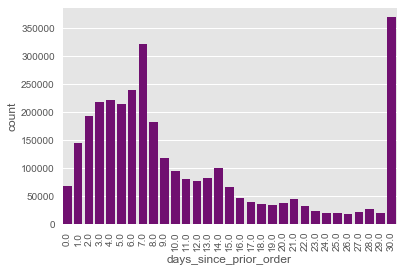

In [31]:
"""
Figure out how long does it take one to re-order his or her groceries.
"""

sns.countplot(orders['days_since_prior_order'],data=orders,color='purple')
plt.xticks(rotation=90)
plt.show()

The plot above shows that most people re-order their items after every 7 days and 30 days. The interquartile range for this data is 4-15 and at first we might think that anything above that might be consider not so relevant but after looking that most people re-order after 30 days, this might have to be kept.



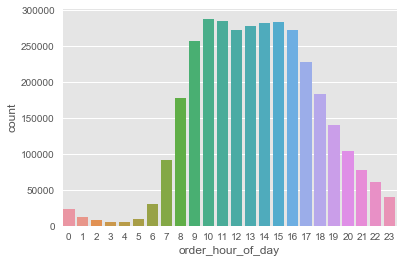

In [32]:
#find out at which time of the day do people usually shop
sns.countplot(x='order_hour_of_day',data=orders)

We can see that most people order their groceries between 9am until 4pm,which is during working hours.

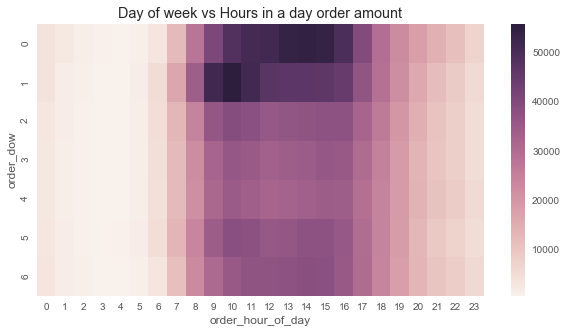

In [33]:
#Figure out days that have the most number of orders and at what time
week_vs_hours = orders.groupby(['order_dow','order_hour_of_day'])['user_id'].aggregate("count").reset_index()


#use heatmap to indicate at which day and at which hour is the most popular
week_vs_hours = week_vs_hours.pivot('order_dow','order_hour_of_day','user_id')
plt.figure(figsize=(10,5))
sns.heatmap(week_vs_hours)
plt.title('Day of week vs Hours in a day order amount')
plt.show()


The heatmap above indicates that most orders occur around 9-10am on Monday and around 2-4pm on Sunday. Least orders happen around 2-4am, which is the time when people sleep.

In [34]:
products_ordered = pd.merge(prior_order,products,on='product_id',how='left')
products_ordered.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [35]:
#find out which product is the most popular item
popular_products = products_ordered['product_name'].value_counts()

In [36]:
top20_products = pd.DataFrame(popular_products.sort_values(ascending=False).head(20).reset_index())
top20_products.columns = ['product_name','number_of_orders']
top20_products

,product_name,number_of_orders
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


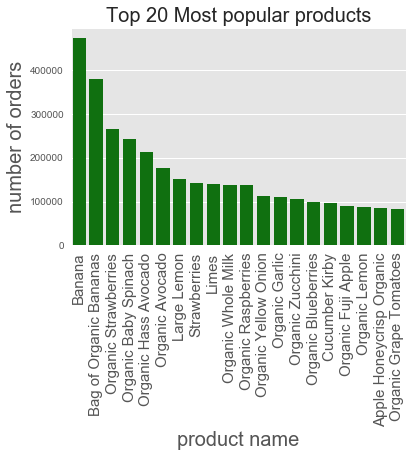

In [37]:
sns.barplot(x = 'product_name',y='number_of_orders', data = top20_products,color = 'green')
plt.xticks(rotation=90,fontsize = 15)
plt.xlabel('product name',fontsize = 20)
plt.ylabel('number of orders',fontsize = 20)
plt.title('Top 20 Most popular products',fontsize = 20)

We can see that the top 20 items include mostly fruits and vegetables, with banana being the most popular item being ordered, followed strawberries.

In [38]:
#find out which products have high reordered rate
reordered = products_ordered.groupby('product_name')['reordered'].mean().sort_values(ascending=False)
reordered = reordered.head(20)
reordered

product_name
Raw Veggie Wrappers                         0.941176
Serenity Ultimate Extrema Overnight Pads    0.931034
Orange Energy Shots                         0.923077
Chocolate Love Bar                          0.920792
Soy Powder Infant Formula                   0.914286
Simply Sleep Nighttime Sleep Aid            0.911111
Energy Shot, Grape Flavor                   0.909091
Sparking Water                              0.900000
Maca Buttercups                             0.900000
Russian River Valley Reserve Pinot Noir     0.900000
Bars Peanut Butter                          0.895522
Soy Crisps Lightly Salted                   0.893939
Jet Fuel Dark Roast Whole Bean Coffee       0.892857
High Gravity Lager                          0.891892
Benchbreak Chardonnay                       0.891892
Buttery Spray                               0.888889
Almond Orgeat Syrup                         0.888889
Organic Blueberry B Mega                    0.885417
Beer Can                         

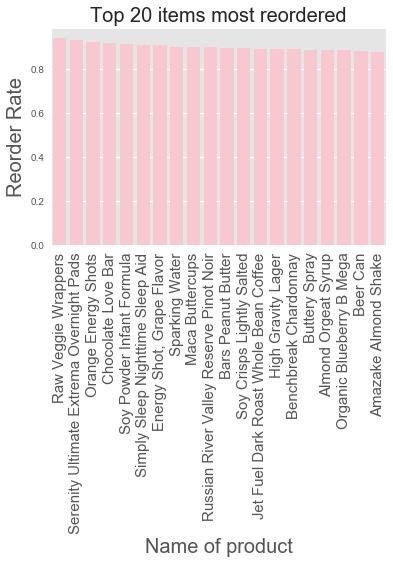

In [39]:
sns.barplot(reordered.index,reordered.values,color='pink')
plt.xticks(rotation='vertical',fontsize = 15)
plt.ylabel('Reorder Rate',fontsize = 20)
plt.xlabel('Name of product',fontsize = 20)
plt.title('Top 20 items most reordered',fontsize = 20)

we can see that from the above graph, the 20 most reodered items. Surprisingly, vegetables and fruits do not make it into the top 20 list.

In [40]:
department_merged_products = pd.merge(products_ordered,departments,how='left',on='department_id')

In [41]:
department_merged_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,Garlic Powder,104,13,pantry
3,2,45918,4,1,Coconut Butter,19,13,pantry
4,2,30035,5,0,Natural Sweetener,17,13,pantry


In [42]:
#figure out what the top 20 aisles are
a = department_merged_products['department'].value_counts()
a_20 = a.sort_values(ascending=False)[0:20]
a_20

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
Name: department, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

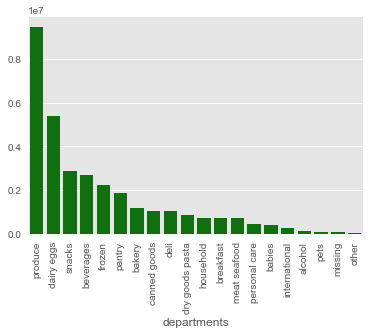

In [43]:
sns.barplot(a_20.index,a_20.values,color='green')
plt.xlabel('departments')
plt.xticks(rotation='vertical')

The top aisles that are most purchased by customers include: produce, dairy eggs,snacks,beverages,etc.

In [44]:
"""merge the two data tables: orders and prior order to figure out the correlation 
between the number of items per order and how long it takes one to reorder afterwards.
By doing so, we can figure out if people who order more items take longer time to reorder?
"""

#we only want 'prior' order here
orders_and_prior = pd.merge(orders,prior_order,how='right',on='order_id')

In [45]:
orders_and_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,10.090909,196,1,0
1,2539329,1,prior,1,2,8,NaN,10.090909,14084,2,0
2,2539329,1,prior,1,2,8,NaN,10.090909,12427,3,0
3,2539329,1,prior,1,2,8,NaN,10.090909,26088,4,0
4,2539329,1,prior,1,2,8,NaN,10.090909,26405,5,0


In [46]:
orders_and_prior.isnull().sum()

order_id                           0
user_id                            0
eval_set                           0
order_number                       0
order_dow                          0
order_hour_of_day                  0
days_since_prior_order       2078068
average_order_hour_of_day          0
product_id                         0
add_to_cart_order                  0
reordered                          0
dtype: int64

In [47]:
k1 = orders_and_prior.groupby('order_id')['add_to_cart_order'].max().reset_index()
k2 = orders_and_prior.groupby('order_id')['days_since_prior_order'].mean().reset_index()

In [48]:
k3 = pd.merge(k1,k2,on='order_id')

In [49]:
k3.head()

,order_id,add_to_cart_order,days_since_prior_order
0,2,9,8.0
1,3,8,12.0
2,4,13,7.0
3,5,26,9.0
4,6,3,30.0


In [50]:
k3.dropna().head()

,order_id,add_to_cart_order,days_since_prior_order
0,2,9,8.0
1,3,8,12.0
2,4,13,7.0
3,5,26,9.0
4,6,3,30.0


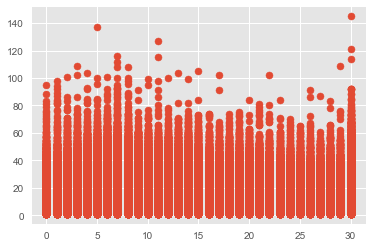

In [51]:
plt.scatter(x='days_since_prior_order',y='add_to_cart_order',data=k3)

Based on the graph above, it can be seen that there is no clear correlation between the number of days it takes someone to do grocery shopping and the number of distinct items purchased. 

In [52]:
"""
Join Department and products table to see what products are under a certain department

"""


products_dept = pd.merge(products,departments,on='department_id', how='right')
products_dept.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


In [53]:
products_dept_aisle = pd.merge(products_dept,aisles, on = 'aisle_id',how='right')
products_dept_aisle.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [54]:
dept_aisle = pd.DataFrame(products_dept_aisle.groupby(['department','aisle'])['aisle_id'].count())
dept_aisle.columns = ['Number of Products']
dept_aisle.head()

Number of Products
department aisle                                         
alcohol    beers coolers                              385
           red wines                                  232
           specialty wines champagnes                  95
           spirits                                    195
           white wines                                147

In [55]:
orders_products = pd.merge(products_dept,orders_and_prior,on='product_id',how='right')
orders_products.head()

,product_id,product_name,aisle_id,department_id,department,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,snacks,3139998,138,prior,28,6,11,3.0,12.545455,5,0
1,1,Chocolate Sandwich Cookies,61,19,snacks,1977647,138,prior,30,6,17,20.0,12.545455,1,1
2,1,Chocolate Sandwich Cookies,61,19,snacks,389851,709,prior,2,0,21,6.0,19.833333,20,0
3,1,Chocolate Sandwich Cookies,61,19,snacks,652770,764,prior,1,3,13,NaN,12.500000,10,0
4,1,Chocolate Sandwich Cookies,61,19,snacks,1813452,764,prior,3,4,17,9.0,12.500000,11,1


In [56]:
orders_products.reset_index(inplace=True)

In [57]:
orders_products.isnull().sum()

index                              0
product_id                         0
product_name                       0
aisle_id                           0
department_id                      0
department                         0
order_id                           0
user_id                            0
eval_set                           0
order_number                       0
order_dow                          0
order_hour_of_day                  0
days_since_prior_order       2078068
average_order_hour_of_day          0
add_to_cart_order                  0
reordered                          0
dtype: int64

In [58]:
orders_per_product = orders_products.groupby('department')['order_id'].count()
No_orders_per_dept = pd.DataFrame(orders_per_product).reset_index()
No_orders_per_dept.head()

,department,order_id
0,alcohol,153696
1,babies,423802
2,bakery,1176787
3,beverages,2690129
4,breakfast,709569


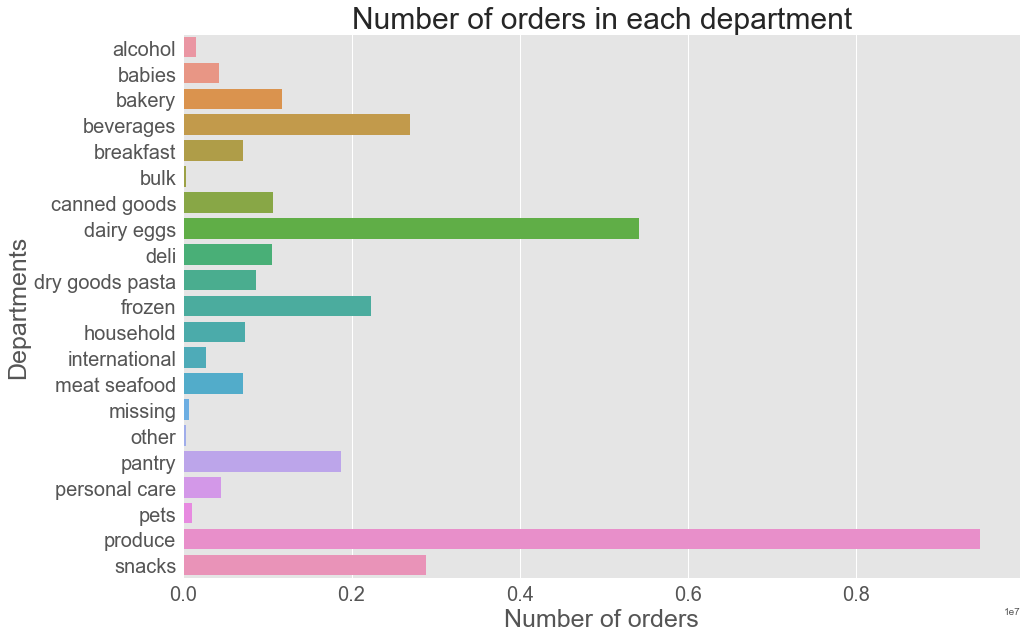

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'order_id',y='department',data=No_orders_per_dept)
plt.yticks(size=20)
plt.xticks(size=20)
plt.ylabel('Departments',fontsize= 25)
plt.xlabel('Number of orders',fontsize=25)
plt.title('Number of orders in each department',fontsize=30)

From the graph above, we can see that most people order from the produce department, followed by the dairy eggs department, followed by snacks and beverages.

In [60]:
orders_and_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,10.090909,196,1,0
1,2539329,1,prior,1,2,8,NaN,10.090909,14084,2,0
2,2539329,1,prior,1,2,8,NaN,10.090909,12427,3,0
3,2539329,1,prior,1,2,8,NaN,10.090909,26088,4,0
4,2539329,1,prior,1,2,8,NaN,10.090909,26405,5,0


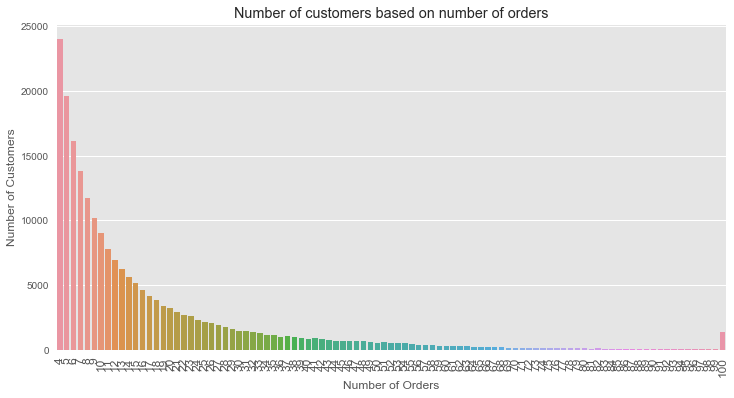

In [61]:
#Analyze how many orders does each customer have
#group the orders and prior orders based on number of orders and how many customers in each segment
orders_per_user = orders.groupby('user_id')['order_number'].max().value_counts()
orders_per_user = pd.DataFrame(orders_per_user).reset_index() #reset index
orders_per_user.columns = ['Number of orders','Count'] #rename the columns
plt.figure(figsize = (12,6))
sns.barplot(orders_per_user['Number of orders'],orders_per_user['Count'])
plt.xticks(rotation= 'vertical',size = 12)
plt.xlabel('Number of Orders',size = 12)
plt.ylabel('Number of Customers',size = 12)
plt.title('Number of customers based on number of orders')



From the graph above, we can see that the number of orders per customer is between 4 and 100 and that we could not simply remove outlier since we can see that there are a handful number of customers who have ordered 100 times. In general, the number of customers decreases as the number of orders increases.

# Statistical Analysis

In [62]:
from scipy import stats


Hypothesis Testing

For the hypothesis testing, we define the following:

 - Null Hypothesis: There is no relationship between day of the week and the hour at which one    orders his or her grocery

- Alternate Hypothesis: There is a relationship between day of week and the hour at which one   orders his or her grocery.

We will assume our significance level, $\alpha$ to be 0.05.



In [63]:
week_vs_hours = orders.pivot_table('order_id','order_dow','order_hour_of_day',aggfunc='count').reset_index()
del week_vs_hours.columns.name
week_vs_hours = week_vs_hours.set_index('order_dow')
week_vs_hours

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


In [64]:
chi2, p, dof, expected = stats.chi2_contingency(week_vs_hours)

In [65]:
chi2

13722.50153097765

In [66]:
p

0.0

The p-value is below the 5% significance level, which indicates that we have to reject the null hypothesis and that there is significant relationship between the hour of day at which one orders his or her grocery and the day of the week.

Next, I would like to figure out if one buys more items the longer he or she is since last groceries.

- Null Hypothesis: There is no correlation between the number of days it takes one to reorder   and the number of items one buys

- Alternative Hypothesis: There is correlation between the number of days it takes one to       reorder and number of items one buys.

In [67]:
"""
Use chi-square test to find if the number of orders is related
to the day of week. For instance, is there more orders on Monday
than on Saturday???
"""

historical_orders = pd.merge(prior_order, orders, on='order_id',how='left')
historical_orders = historical_orders.dropna()
historical_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
0,2,33120,1,1,202279,prior,3,5,9,8.0,11.666667
1,2,28985,2,1,202279,prior,3,5,9,8.0,11.666667
2,2,9327,3,0,202279,prior,3,5,9,8.0,11.666667
3,2,45918,4,1,202279,prior,3,5,9,8.0,11.666667
4,2,30035,5,0,202279,prior,3,5,9,8.0,11.666667


In [68]:
order_size_per_order= historical_orders.groupby('order_id').size()

In [69]:
order_size_per_order.columns = ['Number_Of_items']

In [70]:
order_size_per_order = pd.DataFrame(order_size_per_order).reset_index()
order_size_per_order.columns = ['order_id','No_Of_orders']


In [71]:
days_vs_orders = pd.merge(order_size_per_order,orders,on='order_id',how='left')


In [72]:
days_vs_orders.head()

,order_id,No_Of_orders,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
0,2,9,202279,prior,3,5,9,8.0,11.666667
1,3,8,205970,prior,16,5,17,12.0,13.192308
2,4,13,178520,prior,36,1,9,7.0,9.087719
3,5,26,156122,prior,42,6,16,9.0,13.358491
4,6,3,22352,prior,4,1,12,30.0,13.777778


In [73]:
stats.pearsonr(x = days_vs_orders['days_since_prior_order'],y =days_vs_orders['No_Of_orders'])

(0.05938871618766222, 0.0)

Based on the pearson correlation test, we can see that the p-value is 0, which means that we can reject null hypothesis, that there is correlation between days since prior order and the number of items one orders. However, we can also see that the correlation coefficient is very low, which is only 0.05, meaning that we can also say that they are very weakly correlated, almost close to 0.

# FEATURE ENGINEERING



I will be figuring out what kind of input variables should be included and analyze to be able to know which features are actually important in helping predict which products are going to get reordered by each user.

# User Features

Features we would like to consider: (ONLY USE PRIOR ORDER)

1. How often the user reorders     ('Average Number of days to repurchase')

2. Time of day the user visits and usually on what day

3. List of distinct products

4. Order size

5. Total Number of Items in each order

6. Average Basket Size

7. How many of the user's orders contained no previously purchased orders

In [74]:
users = pd.DataFrame()

In [75]:
users['average_days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean() 
users['Total_orders'] = orders.groupby('user_id').size()
users['total_items'] = orders_and_prior.groupby('user_id').size()
users['All_products'] = orders_and_prior.groupby('user_id')['product_id'].apply(set)
users['total_distinct_items'] = users.All_products.map(len)
users['average_basket'] = users.total_items / users.Total_orders
users=users.reset_index()
users=users.set_index('user_id',drop=False)
print(users.shape)
users.head(2)

(206209, 7)


,user_id,average_days_between_orders,Total_orders,total_items,All_products,total_distinct_items,average_basket
user_id,,,,,,,
1,1,19.000000,11,59,"{17122, 196, 26405, 14084, 46149, 26088, 13032...",18,5.363636
2,2,16.285714,15,195,"{45066, 2573, 18961, 1559, 32792, 23, 22559, 1...",102,13.000000


# Product Features

For the products, there are several features that I am interested in:

1. Total number of orders for that specific product

2. Total reorders

3. Reorder rate for the product

4. Average position in cart for the specific product

In [76]:
#product- analysis:
df_products = pd.DataFrame()
df_products['total_order'] = orders_and_prior.groupby('product_id').size()
df_products['Number_of_times_reordered'] = orders_products.groupby('product_id')['reordered'].sum()
df_products['reorder_rate'] = (df_products['Number_of_times_reordered'])/(df_products['total_order'])
df_products['average_position_in_cart'] = orders_and_prior.groupby('product_id')['add_to_cart_order'].mean()
df_products = df_products.reset_index()
df_products2 = pd.merge(df_products,products,on='product_id',how = 'left')
df_products_final = pd.merge(df_products2,departments,on='department_id',how='left')
df_products_final.head()

,product_id,total_order,Number_of_times_reordered,reorder_rate,average_position_in_cart,product_name,aisle_id,department_id,department
0,1,1852,1136,0.613391,5.801836,Chocolate Sandwich Cookies,61,19,snacks
1,2,90,12,0.133333,9.888889,All-Seasons Salt,104,13,pantry
2,3,277,203,0.732852,6.415162,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,329,147,0.446809,9.507599,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,15,9,0.600000,6.466667,Green Chile Anytime Sauce,5,13,pantry


In [77]:
df_products_final.set_index('product_id',inplace=True)

In [78]:
df_products_final.isnull().sum()

total_order                  0
Number_of_times_reordered    0
reorder_rate                 0
average_position_in_cart     0
product_name                 0
aisle_id                     0
department_id                0
department                   0
dtype: int64

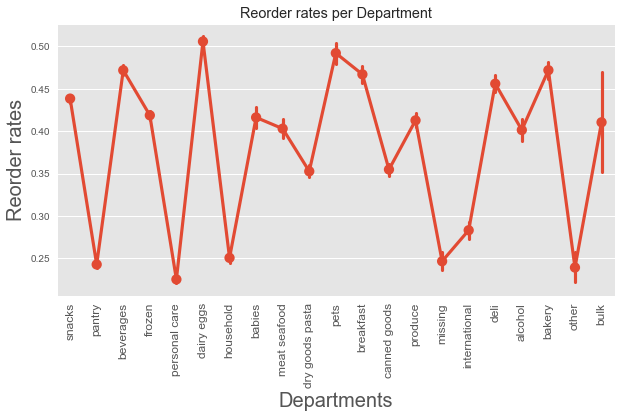

In [79]:
#Analyze which department has most re-order rates:
plt.figure(figsize = (10,5))
sns.pointplot(x = 'department',y = 'reorder_rate',data = df_products_final)
plt.xticks(rotation = 90,size = 12)
plt.xlabel('Departments',size = 20)
plt.ylabel('Reorder rates', size = 20)
plt.title('Reorder rates per Department')

The graph above shows which department has high re-order rates.

We can see that the departments with high reorder rates include snacks,beverages,dairy eggs,babies, meat seafood,pets, breakfast,produce,bakery,deli, and bulk. This is not a surprise since beverages such as water, milk, soda, etc is taken usually on a regular basis and has high probability of getting reordered. Produce also has a pretty high reorder rate as people eat them regularly to stay healthy.

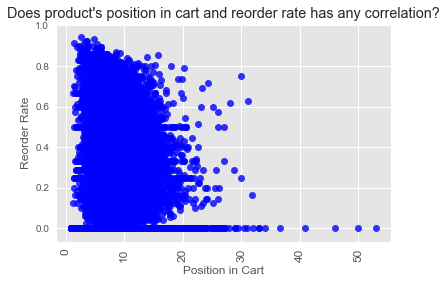

In [80]:
#plot a graph to indicate the relationship between add to cart order and reorder rate
sns.regplot(x = 'average_position_in_cart',y = 'reorder_rate',data = df_products2,
           color='blue',order = 2,fit_reg=False)
plt.xticks(rotation = 90,size = 12)
plt.xlabel('Position in Cart',size = 12)
plt.ylabel('Reorder Rate',size = 12)
plt.title("Does product's position in cart and reorder rate has any correlation?")

For products that are added to cart pretty early, they tend to have higher reorder rate and if they are added later on, they tend to have lower reorder rate.

# User-Products Features

Features to consider:
   1. Number of orders in which the user purchases the item
   2. Days since the user last purchased the item
   3. Position of product per user 
   4. Has the user purchased the item today?

In [81]:
#merge first aisle,products, and department:
aisle_products = pd.merge(products,aisles,on='aisle_id',how='left')
aisle_products_dept = pd.merge(aisle_products,departments,on='department_id',how='left')
prior_order_merged = pd.merge(aisle_products_dept,prior_order,on='product_id',how='right')
user_products = pd.merge(orders,prior_order_merged,on='order_id',how='right')

In [82]:
user_products['user_product_id'] = user_products.product_id + user_products.user_id*100000
user_products = user_products.groupby('user_product_id').agg({'order_id':[
    'size','last'],'add_to_cart_order':'mean'})

In [83]:
user_products.columns = ['Number_of_orders',
                         'Last_order_id','average_position_in_cart']

In [84]:
user_products.head(2)

,Number_of_orders,Last_order_id,average_position_in_cart
user_product_id,,,
100196,10,2550362,1.400000
110258,9,2550362,3.333333


# Train - Test Split

The training order products data above should be used to split between training (80%) and testing (20%) in order to validate the accuracy of the model created. Since the data is a lot, to expedite the process, we will take a sample of 500 users.

In [85]:
#only take 1000 sample of user ids in orders dataset
training_orders = orders[orders.eval_set == 'train']
print('len training_orders = ',training_orders.shape)
unique_users = training_orders['user_id'].unique()
print('unique users len = ',len(unique_users))
import random
sampled_users = random.sample(list(unique_users),1000)
print('sampled users = ',len(sampled_users))
training_orders = training_orders[training_orders['user_id'].isin(sampled_users)]
print('len training_orders after sampling = ',training_orders.shape)

len training_orders =  (131209, 8)
unique users len =  131209
sampled users =  1000
len training_orders after sampling =  (1000, 8)


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
train,cv = train_test_split(training_orders,test_size=0.2)

In [89]:
cv.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
140686,1730778,8444,train,6,2,9,30.0,12.666667
826857,220707,49734,train,15,0,16,30.0,15.200000


In [90]:
test = orders[orders.eval_set == 'test']

In [91]:
test.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day
38,2774568,3,test,13,5,15,11.0,16.307692
44,329954,4,test,6,3,12,30.0,12.500000


In [92]:
#look at the train,cv,and test data:
train_order_id_list = train['order_id'].tolist()
cv_order_id_list = cv['order_id'].tolist()
test_order_id_list = test['order_id'].tolist()
print(len(train_order_id_list))
print(len(cv_order_id_list))
print(len(test_order_id_list))
#figure out the data in train data and test data
#1 order can have multiple products 
#take only the order id from the order_products_train.csv that are in the training set.

train_data = order_products_train[order_products_train['order_id'].isin(train_order_id_list)]
train_data.set_index(['order_id', 'product_id'], inplace=True, drop=False)
cv_data = order_products_train[order_products_train['order_id'].isin(cv_order_id_list)]
cv_data.set_index(['order_id','product_id'],inplace=True,drop=False)
print(train_data.shape)
print(cv_data.shape)

800
200
75000
(8609, 4)
(2100, 4)


In [93]:
train_data.head()

order_id  product_id  add_to_cart_order  reordered
order_id product_id                                                    
1571     1194            1571        1194                  1          0
         778             1571         778                  2          0
         28199           1571       28199                  3          0
         37067           1571       37067                  4          0
10859    35042          10859       35042                  1          1

In [94]:
train_data2 = pd.merge(train_data,orders[['order_id','user_id']],on='order_id',how='left')
cv_data2= pd.merge(cv_data,orders[['order_id','user_id']],on='order_id',how='left')

In [95]:
train_data2.head(2)

,order_id,product_id,add_to_cart_order,reordered,user_id
0,1571,1194,1,0,102719
1,1571,778,2,0,102719


In [96]:
train_data2.set_index(['order_id', 'product_id'], inplace=True, drop=False)
cv_data2.set_index(['order_id','product_id'],inplace=True,drop=False)

# Dataframe with End Features

In [97]:
#create a function to figure out if the prior data is in the 
#train data to be able to know if the person reorders the item or not.

def build_df(str_train_or_test_df):
    if str_train_or_test_df =='train':
        train_or_test_df = train_data2
    elif str_train_or_test_df == 'cv':
        train_or_test_df = cv_data2
    elif str_train_or_test_df == 'test':
        train_or_test_df = test
    order_list = []
    product_list = []
    check_if_prior_in_train = []
   
    for row in train_or_test_df.itertuples():
        order_id = row.order_id
        user_id = row.user_id
        #find out all the products that the user has bought in the past
        list_products = users.All_products[user_id] 
        product_list += list_products
        order_list += [order_id] * len(list_products)
   
        if str_train_or_test_df =='train':
            #for every product in the say 1000 products PER order, check if the prior is in train
            check_if_prior_in_train += [(order_id, product) in train_data2.index for product in list_products]
        elif str_train_or_test_df =='cv':
            #for every product in the say 1000 products PER order, check if the prior is in train
            check_if_prior_in_train += [(order_id, product) in cv_data2.index for product in list_products]
        else:
            check_if_prior_in_train += [0]
        
           
    print('passed')

    temp_df = pd.DataFrame({'order_id':order_list, 'product_id':product_list}, dtype=np.int32)
    print(temp_df.shape)
    check_if_prior_in_train = np.array(check_if_prior_in_train, dtype=np.int8)
    del order_list
    del product_list
    
    final_df = pd.merge(temp_df,orders,on='order_id',how='left')
    final_df['Total_Orders_per_user'] = final_df.user_id.map(users.Total_orders)
    final_df['Total_Number_of_items'] = final_df.user_id.map(users.total_items)
    final_df['average_days_between_orders'] = final_df.user_id.map(users.average_days_between_orders)
    final_df['Average_basket_size'] =  final_df.user_id.map(users.average_basket)
    
    final_df['order_hour_of_day'] = final_df.order_id.map(orders.order_hour_of_day)
    final_df['days_since_prior_order'] = final_df.order_id.map(orders.days_since_prior_order)
    
    products_df = products.set_index('product_id') #for mapping of aisle id and department id
    final_df['aisle_id'] = final_df.product_id.map(products_df.aisle_id)
    final_df['department_id'] = final_df.product_id.map(products_df.department_id)
    final_df['total_order_per_product'] = final_df.product_id.map(df_products_final.total_order)
    final_df['reorder_rate_per_product'] = final_df.product_id.map(df_products_final.reorder_rate)

    final_df['user_product_id'] = final_df.user_id * 100000 + final_df.product_id
    final_df['Number_of_products_per_user'] = final_df.user_product_id.map(user_products.Number_of_orders)
    final_df['Products_order_ratio_per_user'] = (final_df.Number_of_products_per_user / final_df.Total_Orders_per_user)
    final_df['Last_order_id_per_product_per_user'] = final_df.user_product_id.map(user_products.Last_order_id)
    final_df['ave_pos_in_cart_per_product_per_user'] = final_df.user_product_id.map(user_products.average_position_in_cart) 
    
    orders_2 = orders.copy() #for mapping
    orders_2.set_index('order_id',inplace=True) 
    final_df['userproduct_orders_since_last'] = final_df.Total_Orders_per_user - final_df.Last_order_id_per_product_per_user.map(orders_2.order_number)
    final_df['userproduct_delta_hour_vs_last'] = abs(final_df.order_hour_of_day - final_df.Last_order_id_per_product_per_user.map(orders_2.order_hour_of_day).map(lambda x: min(x, 24-x)))
    return (final_df,check_if_prior_in_train)

In [98]:
tr,y_tr = build_df('train')

passed
(693384, 2)


In [99]:
tr['labels'] = y_tr

In [100]:
#replace the days since prior order from NaN to -1 in training data:
tr.days_since_prior_order.fillna(-1,inplace=True)

In [101]:
tr.head(2)


,order_id,product_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_order_hour_of_day,Total_Orders_per_user,...,total_order_per_product,reorder_rate_per_product,user_product_id,Number_of_products_per_user,Products_order_ratio_per_user,Last_order_id_per_product_per_user,ave_pos_in_cart_per_product_per_user,userproduct_orders_since_last,userproduct_delta_hour_vs_last,labels
0,1571,27521,102719,train,32,2,6,30.0,14.46875,32,...,43067,0.695103,10271927521,1,0.03125,2928125,7.0,1,0,0
1,1571,46979,102719,train,32,2,6,30.0,14.46875,32,...,67283,0.618061,10271946979,1,0.03125,2981255,5.0,5,1,0


In [102]:
cv,y_cv = build_df('cv')

passed
(167236, 2)


In [103]:
cv['labels'] = y_cv

In [104]:
cv['days_since_prior_order'].fillna(-1,inplace=True)

In [105]:
cv.shape

(167236, 25)

In [106]:
test_df,_ = build_df('test')

passed
(4833292, 2)


In [107]:
test_df['days_since_prior_order'].fillna(-1,inplace=True)

In [108]:
test_df.shape

(4833292, 24)

In [109]:
"""
Refine the data so that the categorical features
such as order day of week, 
order hour of day, aisle id, and department id are also included
"""
#X Variables in training data:

features = [           
'order_dow', #categorical         
'order_hour_of_day', #categorical            
'days_since_prior_order',                 
'Total_Orders_per_user',                  
'aisle_id', #THIS IS CATEGORICAL                          
'department_id', #THIS IS CATEGORICAL                    
'Total_Number_of_items',       
'average_days_between_orders',         
'Average_basket_size',                       
'total_order_per_product',
'reorder_rate_per_product',
'Number_of_products_per_user',
'Products_order_ratio_per_user',
'ave_pos_in_cart_per_product_per_user',
'userproduct_orders_since_last','userproduct_delta_hour_vs_last'
]
X_train = tr[features]
X_cv = cv[features]
X_test = test_df[features]

# Final DataFrame

In [110]:
X_train_pre_dummy = X_train.copy()
df_department_id = pd.get_dummies(X_train_pre_dummy['department_id'],prefix='department_id',
                                  prefix_sep='_',drop_first=True)
X_train_1 = X_train_pre_dummy.join(df_department_id)

df_order_dow = pd.get_dummies(X_train_pre_dummy['order_dow'],prefix='week',
                              prefix_sep='_',drop_first=True)
df_order_hour_of_day = pd.get_dummies(X_train_pre_dummy['order_hour_of_day'],
                                      prefix = 'Hour', prefix_sep = '_',drop_first=True)
X_train_2 = X_train_1.join(df_order_dow)
X_train_final = X_train_2.join(df_order_hour_of_day)
X_train_final['Hour_3'] = 0
X_train_final['Hour_4'] = 0
X_train_final['Hour_5'] = 0

print('Training data shape:', X_train_final.shape)



#Now make the categorical features in test dataframe:

X_test_pre_dummy = X_test.copy()
test_department_id = pd.get_dummies(X_test_pre_dummy['department_id'],prefix='department_id',
                                  prefix_sep='_',drop_first=True)
X_test_1 = X_test_pre_dummy.join(test_department_id)

test_order_dow = pd.get_dummies(X_test_pre_dummy['order_dow'],prefix='week',
                              prefix_sep='_',drop_first=True)
test_order_hour_of_day = pd.get_dummies(X_test_pre_dummy['order_hour_of_day'],
                                      prefix = 'Hour', prefix_sep = '_',drop_first=True)
X_test_2 = X_test_1.join(test_order_dow)
X_test_final = X_test_2.join(test_order_hour_of_day)

#since X_test is missing 3 columns: Hour_1,Hour_2,Hour_6, we have to join them so that they also have 64 features:
X_test_final['Hour_1'] = 0
X_test_final['Hour_2'] = 0
X_test_final['Hour_6'] = 0
X_test_final['Hour_3'] = 0
X_test_final.drop

print('Testing data shape:',X_test_final.shape)

Training data shape: (693384, 65)
Testing data shape: (4833292, 65)


In [111]:
X_cv_pre_dummy = X_cv.copy()
cv_department_id = pd.get_dummies(X_cv_pre_dummy['department_id'],prefix='department_id',
                                  prefix_sep='_',drop_first=True)
cv_1 = X_cv_pre_dummy.join(df_department_id)

cv_order_dow = pd.get_dummies(X_cv_pre_dummy['order_dow'],prefix='week',
                              prefix_sep='_',drop_first=True)
cv_order_hour_of_day = pd.get_dummies(X_cv_pre_dummy['order_hour_of_day'],
                                      prefix = 'Hour', prefix_sep = '_',drop_first=True)
cv_2 =cv_1.join(df_order_dow)
X_cv_final = cv_2.join(df_order_hour_of_day)
X_cv_final['Hour_3'] = 0
X_cv_final['Hour_4'] = 0
X_cv_final['Hour_5'] = 0

print('cv data shape:', X_cv_final.shape)

cv data shape: (167236, 65)


# MACHINE LEARNING #

I will be using several machine learning techniques here to predict which products each user is going to reorder. I will also compare several of the techniques in order to find out which algorithm produces the highest accuracy and efficient. By doing so, the algorithm that has the highest accuracy and efficiency would be recommended to Instacart.

# Dummy Classifier

accuracy score: 0.87891961061
Confusion Matrix: 
[[146987      0]
 [ 20249      0]]
F1 Score:
0.0


/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


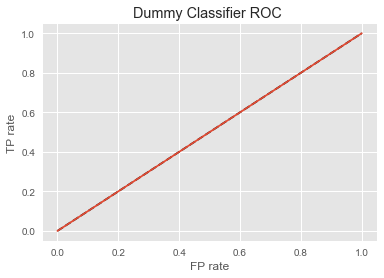

0.5

In [112]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

dummy_classifier = DummyClassifier(strategy="most_frequent",
                                  random_state=100)
dummy_classifier.fit(X_train_final,tr['labels']) #fit x train and y train

#predict the y from the dummy model:
y_dummy_predicted = dummy_classifier.predict(X_cv_final)

#Get the Accuracy Score for actual and predicted for the cross validated dataset
print('accuracy score:',accuracy_score(y_cv,y_dummy_predicted)) 
#Get the Confusion Matrix:
print('Confusion Matrix: ')
print(confusion_matrix(y_cv,y_dummy_predicted))
print('F1 Score:')
print(f1_score(y_cv,y_dummy_predicted))

y_pred_dummy_proba = dummy_classifier.predict_proba(X_cv_final)[:,1]
fpr,tpr,thresholds=roc_curve(y_cv,y_pred_dummy_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Dummy Classifier')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Dummy Classifier ROC ')
plt.show()

roc_auc_score(y_cv,y_pred_dummy_proba)

The Dummy Classifier accuracy rate is 87% and the roc auc score is 0.5, which means that the minimum acceptable roc auc score is 0.5.

The accuracy rate of 87% here does not mean anything except that 87% of the labels are 0 instead of 1.

The F-1 Score is 0 since most of the values here are 0 instead of 1, which means that the precision is 0, which results in an F-1 score of 0.

For our upcoming models, we expect our models to have a higher F-1 and roc auc score in comparison to the dummy classifier.

# Logistic Regression and Features Selection

In [113]:
#input to logistic regression from training data
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

In [114]:
#Select K best features:
select = SelectKBest()
selector = select.fit(X_train_final,y_tr)
X_train_new = selector.transform(X_train_final)
features_score = selector.scores_
features_score = pd.DataFrame(features_score)
features_score.columns=['score']

/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [44 45 46] are constant.
  UserWarning)
/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


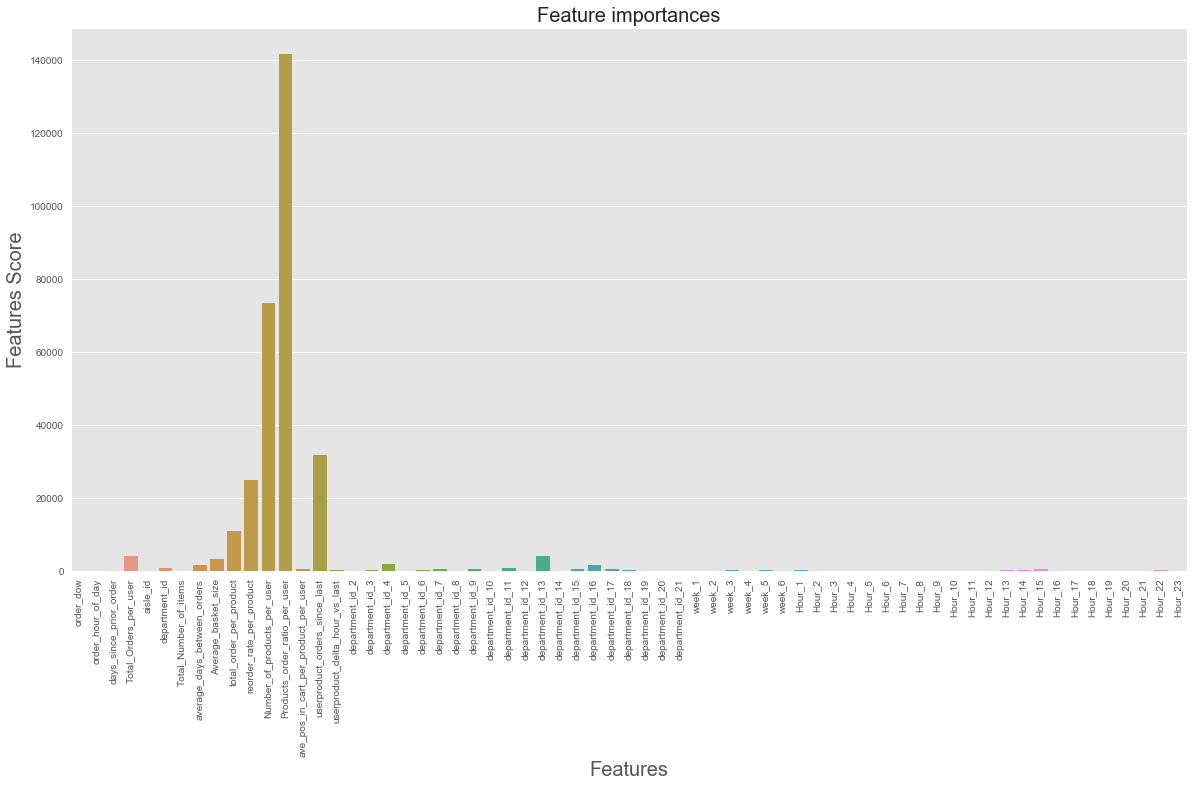

In [115]:
plt.figure(figsize=(20,10))
sns.barplot(x=X_train_final.columns,y=features_score['score'])
plt.xticks(rotation='vertical')
plt.ylabel('Features Score',size=20)
plt.xlabel('Features',size=20)
plt.title('Feature importances',size=20)

In [116]:
features_score['feature'] = X_train_final.columns
features_score.head()

,score,feature
0,36.475263,order_dow
1,9.009393,order_hour_of_day
2,155.627933,days_since_prior_order
3,4269.762191,Total_Orders_per_user
4,191.608336,aisle_id


In [117]:
less_features = [x for x in features_score.itertuples() if x.score > 1000]
len(less_features)

11

In [118]:
less_features = pd.DataFrame(less_features)
less_features

,Index,score,feature
0,3,4269.762191,Total_Orders_per_user
1,7,1738.197878,average_days_between_orders
2,8,3481.228166,Average_basket_size
3,9,10939.213448,total_order_per_product
4,10,24978.875343,reorder_rate_per_product
5,11,73530.665215,Number_of_products_per_user
6,12,141772.279138,Products_order_ratio_per_user
7,14,31739.777576,userproduct_orders_since_last
8,18,2122.626367,department_id_4
9,27,4208.876354,department_id_13


In [119]:
less_features_list = list(set(less_features.feature))

In [120]:
X_train_features = X_train_final[less_features_list]
X_cv_features = X_cv_final[less_features_list]

The features that are most important in predicting if one is going to reorder a certain products include:
1. Number of times the product is ordered
2. reorder rate per product
3. Number of products per user
4. How much of a percentage of total orders is that specific product?
5. When is the last time that the user order that specific product?

The department id, hours, order day of week, and time between orders do not seem to have significant impact. Thus we would remove them from the model.

# FOR KAGGLE COMPETITION

In [121]:
logreg = LogisticRegression()
logreg.fit(X_train_features,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
test_x_predict_prob = pd.DataFrame()
test_x_predict_prob['predict_proba'] = logreg.predict_proba(X_train_features)[:,1]

In [123]:
reordered_products = pd.DataFrame()
reordered_products['order_id'] = test_df['order_id']
reordered_products['product_id'] = test_df['product_id']
reordered_products['prediction'] = test_x_predict_prob['predict_proba']
best_threshold = 0.16
reordered_products['predicted_1_or_0'] = reordered_products['prediction'].apply(lambda x: x>best_threshold).astype(np.int8)

In [124]:
reordered_products_2 = reordered_products[reordered_products.predicted_1_or_0 == 1]
reordered_products_2 = reordered_products_2.groupby('order_id')

In [125]:
TRESHOLD = 0.16

d = dict()
for row in reordered_products.itertuples():
    if row.prediction > TRESHOLD:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in reordered_products.order_id:
    if order not in d:
        d[order] = 'None'

sub = pd.DataFrame.from_dict(d, orient='index')

sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']

Using Logistic Regression, I got a score of 0.33 for the Kaggle Competition.

# CROSS VALIDATION USING LOGISTIC REGRESSION

In [136]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5,8,15)
paramgrid = {'C':c_space}

In [137]:
#check accuracy for model using features that have been deemed to be best:
mdl2 = LogisticRegression()
mdl_features = GridSearchCV(mdl2,paramgrid,cv=3)
mdl_features.fit(X_train_features,y_tr)
print('The best parameters for the model is:',mdl_features.best_params_)
print('The best score for the model is:',mdl_features.best_score_)

The best parameters for the model is: {'C': 0.0061054022965853268}
The best score for the model is: 0.878589641526


In [ ]:
#Fit the Logistic model using the best parameters:
logreg = LogisticRegression(C=mdl_features.best_params_['C'])
logreg.fit(X_train_features,y_tr)
predict_proba_logistic = logreg.predict_proba(X_cv_features)[:,1]
predict_proba_logistic_df = pd.DataFrame(predict_proba_logistic)
predict_proba_logistic_df['actual'] = y_cv
predict_proba_logistic_df.columns = ['predicted_proba','actual']

In [ ]:
#choose treshold based on performance measures to get the accuracy and f1 score for the Logistic Model
from sklearn.metrics import accuracy_score,f1_score
TRESHOLD = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4]
for tre in TRESHOLD:
    predict_proba_logistic_df['predicted_1_or_0']= predict_proba_logistic_df['predicted_proba'].apply(lambda x: x>tre).astype(np.int8)
    print('treshold:',tre,'| auc:',roc_auc_score(predict_proba_logistic_df.actual, predict_proba_logistic_df.predicted_1_or_0),
          '| accuracy:',accuracy_score(predicted_proba_cv.actual, predicted_proba_cv.predicted_1_or_0),
         '| f1_score:',f1_score(predicted_proba_cv.actual, predicted_proba_cv.predicted_1_or_0))

In [ ]:
#check the accuracy of the model using the cv. test would be use for kaggle:

paramgrid = {'C':c_space}
mdl = LogisticRegression()
mdl_cv = GridSearchCV(mdl,paramgrid,cv=3)
mdl_cv.fit(X_cv_features,y_cv)
print('The best parameters for the model is:',mdl_cv.best_params_)
print('The best score for the model is:',mdl_cv.best_score_)

In [138]:
mdl2_final = LogisticRegression(C=mdl_features.best_params_['C'])
mdl2_final.fit(X_train_features,y_tr)

#get the predicted probabilities of each user product:
predicted_proba_features = mdl2_final.predict_proba(X_cv_features)[:,1]
predicted_proba_features_df = pd.DataFrame(predicted_proba_features)
predicted_proba_features_df['actual'] = y_cv
predicted_proba_features_df.columns = ['predicted_proba','actual']

In [139]:
#choose treshold based on performance measures to get the accuracy and f1 score for the Logistic Model
from sklearn.metrics import accuracy_score,f1_score
TRESHOLD = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4]
for tre in TRESHOLD:
    predicted_proba_features_df['predicted_1_or_0']= predicted_proba_features_df['predicted_proba'].apply(lambda x: x>tre).astype(np.int8)
    print('treshold:',tre,'| auc:',roc_auc_score(predicted_proba_features_df.actual, predicted_proba_features_df.predicted_1_or_0),
          '| accuracy:',accuracy_score(predicted_proba_features_df.actual, predicted_proba_features_df.predicted_1_or_0),
         '| f1_score:',f1_score(predicted_proba_features_df.actual, predicted_proba_features_df.predicted_1_or_0))


treshold: 0.1 | auc: 0.69354662467 | accuracy: 0.570026788491 | f1_score: 0.325418640649
treshold: 0.12 | auc: 0.707473459071 | accuracy: 0.62108038939 | f1_score: 0.344257375539
treshold: 0.14 | auc: 0.710523828727 | accuracy: 0.664055586118 | f1_score: 0.357479414456
treshold: 0.16 | auc: 0.710866013451 | accuracy: 0.703879547466 | f1_score: 0.370621727416
treshold: 0.18 | auc: 0.712373502467 | accuracy: 0.747548374752 | f1_score: 0.389801847114
treshold: 0.2 | auc: 0.702035541767 | accuracy: 0.780836661963 | f1_score: 0.397884084637
treshold: 0.22 | auc: 0.689657038661 | accuracy: 0.803726470377 | f1_score: 0.399465768963
treshold: 0.24 | auc: 0.678894683033 | accuracy: 0.823805879117 | f1_score: 0.401292262679
treshold: 0.26 | auc: 0.671913511139 | accuracy: 0.837732306441 | f1_score: 0.403411963858
treshold: 0.28 | auc: 0.661368923827 | accuracy: 0.850821593437 | f1_score: 0.400403768506
treshold: 0.3 | auc: 0.65399834881 | accuracy: 0.86499916286 | f1_score: 0.402519384974
tresho

In [141]:
#CREATE CONFUSION MATRIX:
best_threshold = 0.3
predicted_proba_features_df['predicted_1_or_0']=predicted_proba_features_df['predicted_proba'].apply(lambda x: x>best_threshold).astype(np.int8)
confusion_matrix(predicted_proba_features_df.actual,predicted_proba_features_df.predicted_1_or_0)


array([[137054,   9933],
       [ 12644,   7605]])

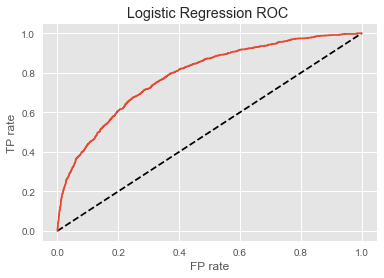

roc auc score for cross validated: 0.65399834881


In [162]:
#Plot the ROC Curve for the Logistic Regression:
fpr,tpr,thresholds=roc_curve(y_cv,predicted_proba_features_df['predicted_proba'])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Logistic Regression ROC ')
plt.show()
print('roc auc score for cross validated:',roc_auc_score(y_cv,predicted_proba_features_df['predicted_1_or_0']))



# Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint 

param_dist = {"max_depth": [5, None],
              "max_features": (5,6,7,8,9,10,11),
              "min_samples_leaf": (1,2,3,4,5),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_dist,cv=3)
tree_cv.fit(X_train_features,y_tr)
print('The best parameters for the model is:',tree_cv.best_params_)
print('The best model score is:',tree_cv.best_score_)

The best parameters for the model is: {'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 4}
The best model score is: 0.882580215292


In [150]:
#Fit the Decision Tree model using the best parameters:
tree_new = DecisionTreeClassifier(criterion=tree_cv.best_params_['criterion'],
                                 max_depth = tree_cv.best_params_['max_depth'],
                                  max_features = tree_cv.best_params_['max_features'],
                                  min_samples_leaf = tree_cv.best_params_['min_samples_leaf'])
tree_new.fit(X_train_features,y_tr)
predict_proba_tree = tree_new.predict_proba(X_cv_features)[:,1]
predict_proba_tree_df = pd.DataFrame(predict_proba_tree)
predict_proba_tree_df['actual'] = y_cv
predict_proba_tree_df.columns = ['predicted_proba','actual']

In [151]:
TRES = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3]
for tre in TRES:
    predict_proba_tree_df['predicted_1_or_0']= predict_proba_tree_df['predicted_proba'].apply(lambda x: x>tre).astype(np.int8)
    print('treshold:',tre,'| auc:',roc_auc_score(predict_proba_tree_df.actual, predict_proba_tree_df.predicted_1_or_0),
          '| accuracy:',accuracy_score(predict_proba_tree_df.actual, predict_proba_tree_df.predicted_1_or_0),
         '| f1_score:',f1_score(predict_proba_tree_df.actual, predict_proba_tree_df.predicted_1_or_0))


treshold: 0.1 | auc: 0.720965818209 | accuracy: 0.707748331699 | f1_score: 0.379593546504
treshold: 0.12 | auc: 0.720965818209 | accuracy: 0.707748331699 | f1_score: 0.379593546504
treshold: 0.14 | auc: 0.717303995176 | accuracy: 0.735631084216 | f1_score: 0.388340112338
treshold: 0.16 | auc: 0.710625679666 | accuracy: 0.788526393839 | f1_score: 0.410389783602
treshold: 0.18 | auc: 0.71000471931 | accuracy: 0.788669903609 | f1_score: 0.409904494757
treshold: 0.2 | auc: 0.681895084772 | accuracy: 0.8539309718 | f1_score: 0.42991831972
treshold: 0.22 | auc: 0.681895084772 | accuracy: 0.8539309718 | f1_score: 0.42991831972
treshold: 0.24 | auc: 0.681895084772 | accuracy: 0.8539309718 | f1_score: 0.42991831972
treshold: 0.26 | auc: 0.680622128792 | accuracy: 0.867187686862 | f1_score: 0.44200477327
treshold: 0.28 | auc: 0.666458758391 | accuracy: 0.87215671267 | f1_score: 0.4280057788
treshold: 0.3 | auc: 0.666458758391 | accuracy: 0.87215671267 | f1_score: 0.4280057788


In [152]:
best_thre = 0.2
predict_proba_tree_df['predicted_1_or_0'] = predict_proba_tree_df['predicted_proba'].apply(lambda x: x>best_thre).astype(np.int8)
confusion_matrix(predict_proba_tree_df.actual,predict_proba_tree_df.predicted_1_or_0)

array([[133597,  13390],
       [ 11038,   9211]])

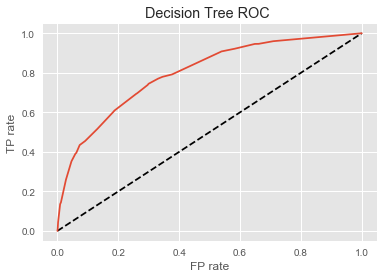

roc auc score for cross validated: 0.681895084772


In [153]:
#Plot the ROC Curve for the Decision Tree:
fpr,tpr,thresholds=roc_curve(y_cv,predict_proba_tree_df['predicted_proba'])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Decision Tree ROC ')
plt.show()
print('roc auc score for cross validated:',roc_auc_score(y_cv,predict_proba_tree_df['predicted_1_or_0']))


From the ROC Curve above, we can see that the Decision Tree Model is also a better predictor in comparison to the dummy classifier since the dummy classifier is simply random guessing with ROC of 0.5.

# Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc = RandomForestClassifier()
param_grid_rfc = {"max_depth": [5,6,7,8,9,10],
                  "min_samples_split" :[3,4,5,6],
                  "min_samples_leaf": [3,4,5],
                  "max_features": (7,8,9,10,11)}    
rfc_cv = GridSearchCV(rfc,param_grid_rfc,cv=3)
rfc_cv.fit(X_train_features,y_tr)
print('Best parameters for Random Forest:',rfc_cv.best_params_)
print('Best Score for Random Forest:',rfc_cv.best_score_)

Best parameters for Random Forest: {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 6}
Best Score for Random Forest: 0.883759936774


In [155]:
#Fit the Random Forest model using the best parameters:
rfc_new = RandomForestClassifier(max_depth = rfc_cv.best_params_['max_depth'],
                                  max_features = rfc_cv.best_params_['max_features'],
                                  min_samples_leaf = rfc_cv.best_params_['min_samples_leaf'],
                                  min_samples_split = rfc_cv.best_params_['min_samples_split'])
rfc_new.fit(X_train_features,y_tr)

predict_proba_rf = rfc_new.predict_proba(X_cv_features)[:,1]
predict_proba_rf_df = pd.DataFrame(predict_proba_rf)
predict_proba_rf_df['actual'] = y_cv
predict_proba_rf_df.columns = ['predict_proba','actual']

In [156]:
TRESHOLD_rfc = [0.1,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28]
for tre in TRESHOLD_rfc:
    predict_proba_rf_df['predicted_1_or_0']=predict_proba_rf_df['predict_proba'].apply(lambda x: x>tre).astype(np.int8)
    print('treshold:',tre,'| auc:',roc_auc_score(predict_proba_rf_df.actual, predict_proba_rf_df.predicted_1_or_0),
          '| accuracy:',accuracy_score(predict_proba_rf_df.actual, predict_proba_rf_df.predicted_1_or_0),
         '| f1_score:',f1_score(predict_proba_rf_df.actual, predict_proba_rf_df.predicted_1_or_0))


treshold: 0.1 | auc: 0.728182297412 | accuracy: 0.69767872946 | f1_score: 0.381003685158
treshold: 0.14 | auc: 0.735269694578 | accuracy: 0.772638666316 | f1_score: 0.422169202012
treshold: 0.16 | auc: 0.718071916408 | accuracy: 0.801615680834 | f1_score: 0.425933936636
treshold: 0.18 | auc: 0.709681313524 | accuracy: 0.817593101964 | f1_score: 0.42958918454
treshold: 0.2 | auc: 0.695805905208 | accuracy: 0.835980291325 | f1_score: 0.429943056652
treshold: 0.22 | auc: 0.689158680739 | accuracy: 0.848734722189 | f1_score: 0.433805590994
treshold: 0.24 | auc: 0.684703627702 | accuracy: 0.855162763998 | f1_score: 0.434620232482
treshold: 0.26 | auc: 0.68253159594 | accuracy: 0.860813461216 | f1_score: 0.437631369138
treshold: 0.28 | auc: 0.674125460219 | accuracy: 0.865573201942 | f1_score: 0.431594649946


In [157]:
best = 0.26
predict_proba_rf_df['predicted_1_or_0'] = predict_proba_rf_df['predict_proba'].apply(lambda x:x>best).astype(np.int8)
confusion_matrix(predict_proba_rf_df.actual,predict_proba_rf_df.predicted_1_or_0)

array([[134902,  12085],
       [ 11192,   9057]])

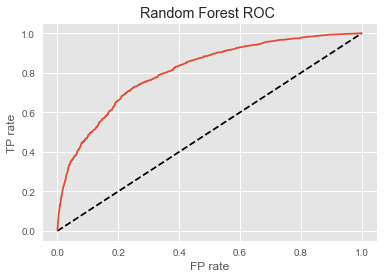

roc auc score for cross validated: 0.68253159594


In [159]:
#Plot the ROC Curve for the Random Forest:
fpr,tpr,thresholds=roc_curve(y_cv,predict_proba_rf_df['predict_proba'])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Random Forest ROC ')
plt.show()
print('roc auc score for cross validated:',roc_auc_score(y_cv,predict_proba_rf_df['predicted_1_or_0']))



# Conclusion

In [161]:
less_features.sort_values('score',ascending=False)

,Index,score,feature
6,12,141772.279138,Products_order_ratio_per_user
5,11,73530.665215,Number_of_products_per_user
7,14,31739.777576,userproduct_orders_since_last
4,10,24978.875343,reorder_rate_per_product
3,9,10939.213448,total_order_per_product
0,3,4269.762191,Total_Orders_per_user
9,27,4208.876354,department_id_13
2,8,3481.228166,Average_basket_size
8,18,2122.626367,department_id_4
1,7,1738.197878,average_days_between_orders


<b>The top features that are important for the model to predict which products are going to be reordered per user include: </b>

1. Out of all orders, how many times does the user include the product

2. How many products the user have bought in the past to indicate if he oftens buy products from instacart

3. How long has it been since the product is last purchased by the user

4. How often does the user reorder the product after buying it right previously?

5. Out of total orders, what percentage of it does the product comprise of?

6. How many orders have the users placed?

7. Department id 13: Pantry Department. Turns out that pantry department are often reordered

8. Average basket size per user

9. Department id 4: Produce Department. Produce department products are often reordered as well, which is not a surprise.

10. Average number of days the user usually takes to reorder.

11. Department id 16: Dairy Eggs Department. Dairy Eggs also tend to get reordered a lot, which is not a surprise.

<b><h2>Model Discussion</h2></b>

Here we use the F-1 score along with the ROC Curve(AUC Score) to analyze which model results in the best prediction. The F-1 score indicates a weighted average of precision and recall.

<li> Dummy Classifier: The Dummy Classifier indicates an F-1 score of 0, which means that it is the worst possible model for test accuracy. Which is as expected. The ROC Curve also lies on the 45-degree angle, which means that our baseline is 0.5.

<li> Logistic Regression: The Logistic Regression indicates an F-1 score of 0.4 and an AUC of 0.65, meaning that the Logistic Regression is a better model in comparison to the dummy classifier model.

<li> Decision Tree: The Decision Tree indicates an F-1 score of 0.43 and an AUC of 0.68. This means that this model is an even better performer in predicting the test samples in comparison to the Logistic Regression.

<li> Random Forest: The Random Forest indicates an F-1 score of 0.44 and an AUC score of 0.68. This is not much different from that of the Decision Tree in predicting the test samples.

Overall, the best model is the Decision Tree since it produces roughly the same result as Random Forest and takes a lot less time to process than the Random Forest.

